### Forecast using the VAR model    

[Vector Autoregression (VAR)](https://en.wikipedia.org/wiki/Vector_autoregression) is a linear model that is used to  find interdependencies among multiple time series.    

VAR model creates a linear combination of k steps of series from the past to predict the next value of the series.    

VAR model can also be used in combination with the MA model to create a VARMA forecasting model.

In [13]:
from utils import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

n_forecast_days = 5
n_lag_days = 30
n_features = 7

n_test_days = 360

In [14]:
df_t = read_target_df('water_level/Farkasic H.csv')
df_2 = read_target_df('flow/Farkasic Q.csv')

df_3 = read_target_df('flow/Jamnicka kiselica Q.csv')
df_4 = read_target_df('water_level/Jamnicka kiselica H.csv')
df_5 = read_target_df('water_level/Karlovac H.csv')
df_6 = read_target_df('water_level/Kamanje H.csv')
df_7 = read_target_df('flow/Kamanje Q.csv')

df_8 = read_csv('rainfall/plaski.csv')
df_9 = read_csv('rainfall/slunj.csv')
df_10 = read_csv('rainfall/pisarovina.csv')
print_df_info(df_t)

(2191, 2)
date      datetime64[ns]
target           float64
dtype: object


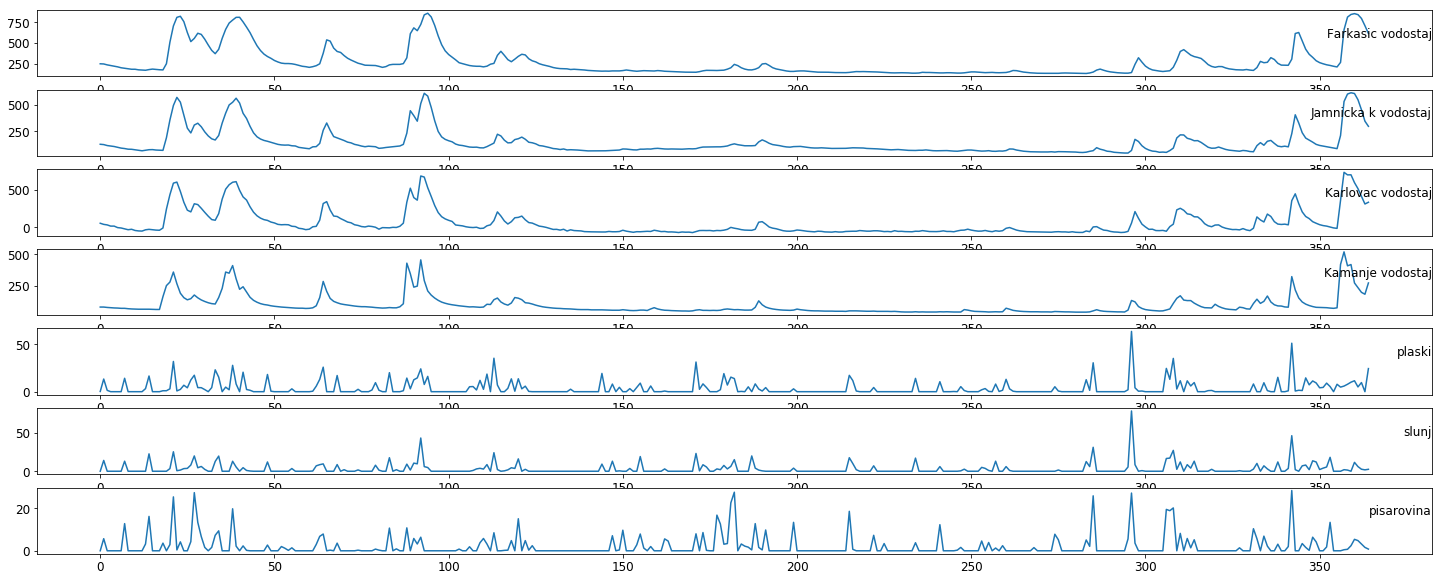

            Farkasic vodostaj  Jamnicka k vodostaj  Karlovac vodostaj  \
date                                                                    
2009-01-01              248.0                128.0               52.0   
2009-01-02              246.0                125.0               37.0   
2009-01-03              235.0                116.0               30.0   
2009-01-04              227.0                111.0               14.0   
2009-01-05              218.0                107.0               14.0   

            Kamanje vodostaj  plaski  slunj  pisarovina  
date                                                     
2009-01-01              83.0     0.2    0.0         0.0  
2009-01-02              83.0    13.3   14.0         5.7  
2009-01-03              80.0     1.4    0.0         0.0  
2009-01-04              78.0     0.0    0.0         0.0  
2009-01-05              76.0     0.0    0.0         0.0  
            Farkasic vodostaj  Jamnicka k vodostaj  Karlovac vodostaj  \
date     

In [15]:
dataset = DataFrame()
dataset["date"] = df_t["date"]
dataset["Farkasic vodostaj"] = df_t.target
dataset["Jamnicka k vodostaj"] = df_4.target
dataset["Karlovac vodostaj"] = df_5.target
dataset["Kamanje vodostaj"] = df_6.target

dataset["plaski"] = df_8.padaline
dataset["slunj"] = df_9.padaline
dataset["pisarovina"] = df_10.padaline

dataset.set_index(["date"], inplace=True)

plot_multi_dataframe(dataset, 0, 365)
print_df_info(dataset, verbose=True)

In [16]:
values = dataset.values
train = dataset[:-n_test_days]
test = dataset[-n_test_days:]
print(train.head())
print(test.head())

            Farkasic vodostaj  Jamnicka k vodostaj  Karlovac vodostaj  \
date                                                                    
2009-01-01              248.0                128.0               52.0   
2009-01-02              246.0                125.0               37.0   
2009-01-03              235.0                116.0               30.0   
2009-01-04              227.0                111.0               14.0   
2009-01-05              218.0                107.0               14.0   

            Kamanje vodostaj  plaski  slunj  pisarovina  
date                                                     
2009-01-01              83.0     0.2    0.0         0.0  
2009-01-02              83.0    13.3   14.0         5.7  
2009-01-03              80.0     1.4    0.0         0.0  
2009-01-04              78.0     0.0    0.0         0.0  
2009-01-05              76.0     0.0    0.0         0.0  
            Farkasic vodostaj  Jamnicka k vodostaj  Karlovac vodostaj  \
date     

In [17]:
def plot_results(real, predicted):
    
    # plot
    plt.figure(figsize=(25,10))
    plt.plot(real[:32], label='real')
    plt.plot(predicted[:32], color='red', label='prediction')
    plt.legend(loc="upper right")
    plt.show()
    
    # plot
    plt.figure(figsize=(25,10))
    plt.plot(real, label='real')
    plt.plot(predicted, color='red', label='prediction')
    plt.legend(loc="upper right")
    plt.show()

In [18]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def run_forecast(lag_nr):
    
    print("Forecast for lag: ", lag_nr)

    values = dataset.values
    train = dataset[:-n_test_days]
    test = dataset[-n_test_days:]
    history = train.copy(deep=True)
    predictions = list()

    for t in range(len(test)):
        model = VAR(history)        
        results = model.fit(lag_nr)
        yhat = results.forecast(history.values[-lag_nr:], 1)[0][0]       
        predictions.append(yhat)
        history = history.append(test[t:t+1])
    
    y_actual = test.values[:, 0]
    rmse = sqrt(mean_squared_error(y_actual, predictions))
    print('Test MSE: %.3f' % rmse)
    print("MAE: ",  mean_absolute_error(y_actual, predictions))

    plot_results(y_actual, predictions)
    
    return rmse

Running the model with different k values 1 through 10.

Forecast for lag:  1
Test MSE: 40.847
MAE:  25.7895131471


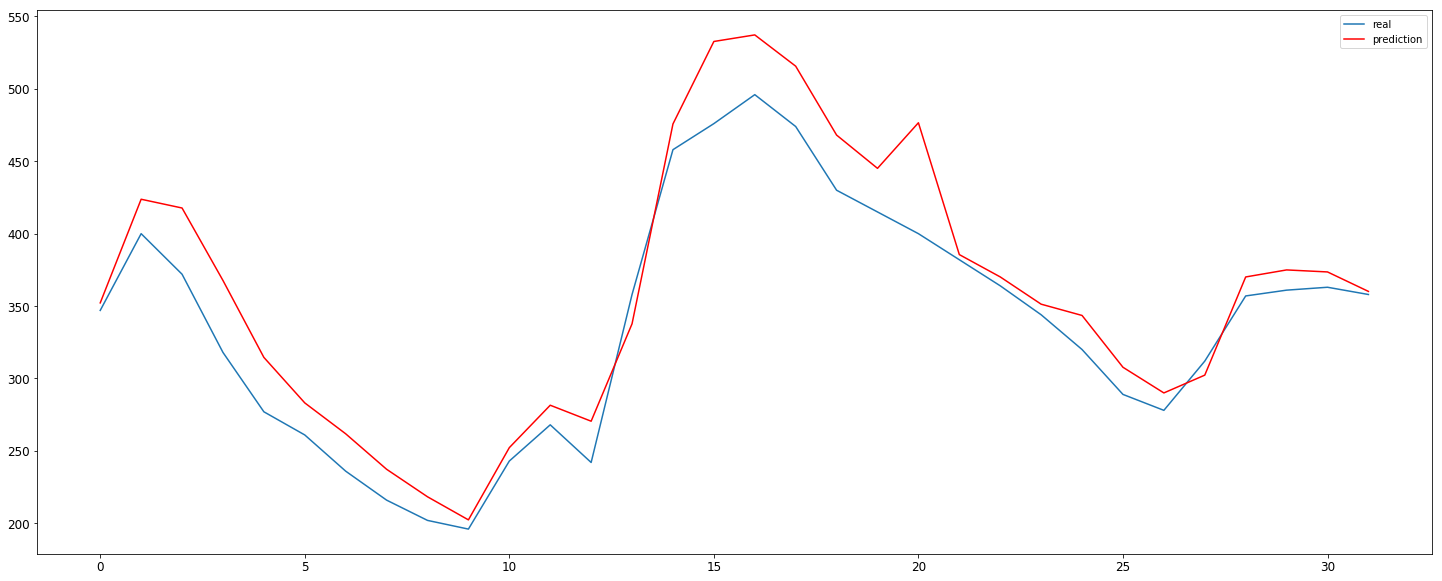

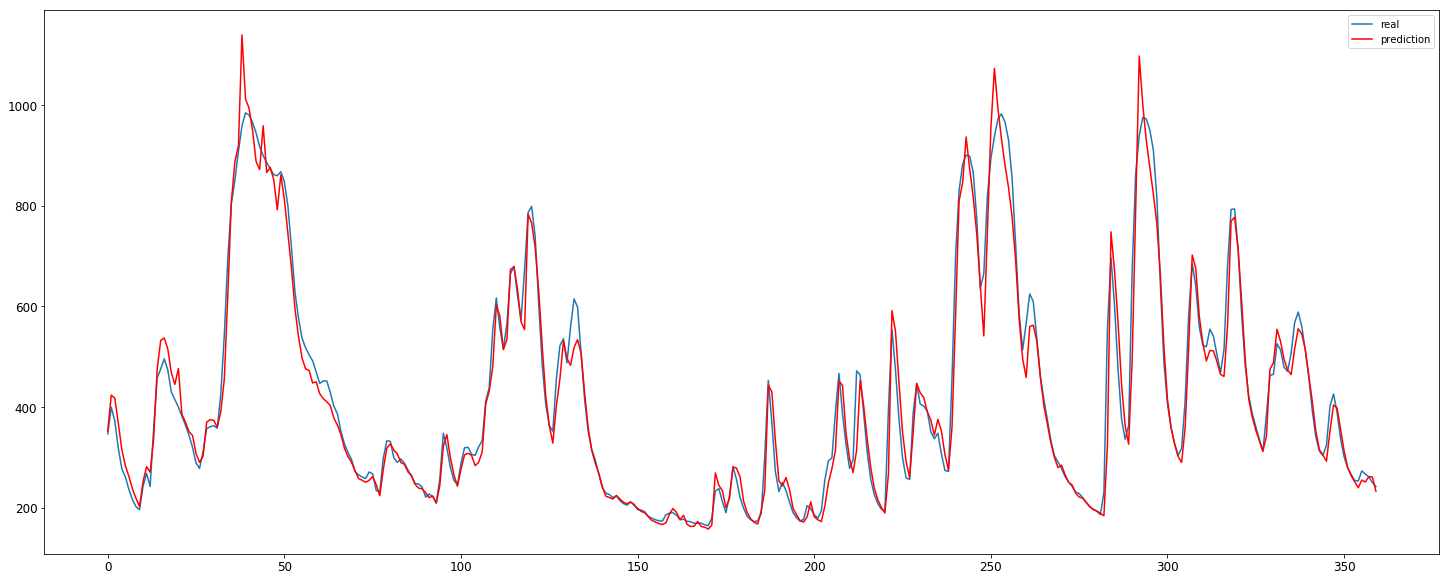

Forecast for lag:  2
Test MSE: 34.472
MAE:  20.4682861472


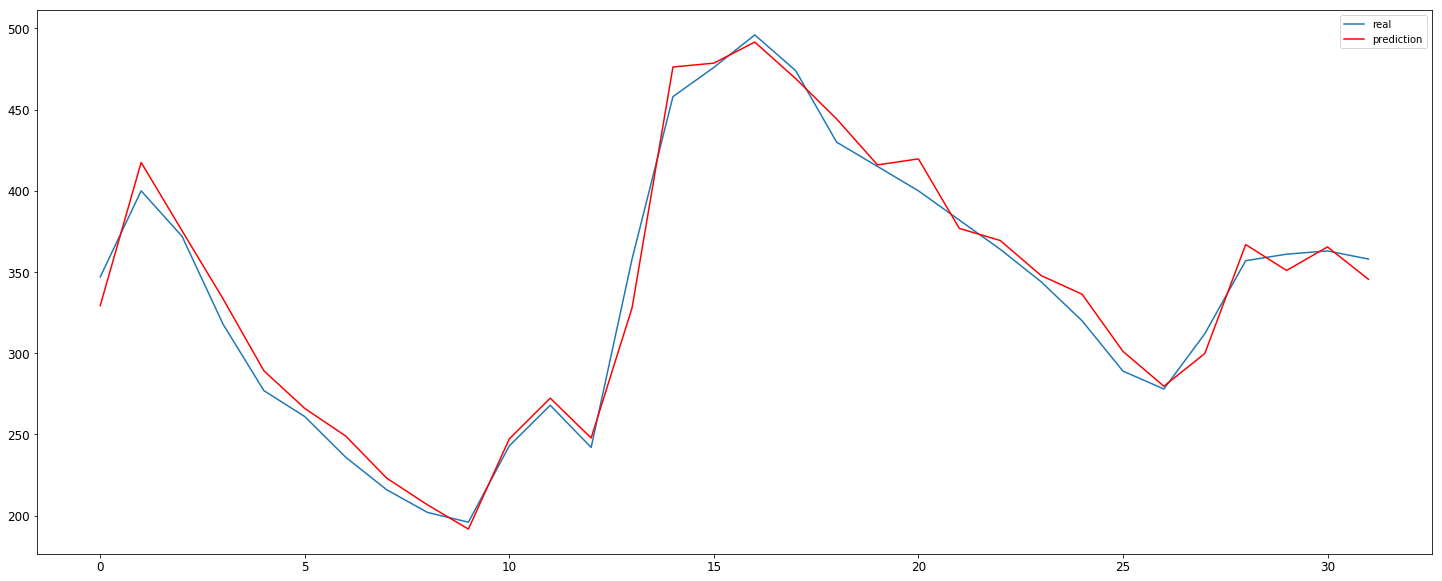

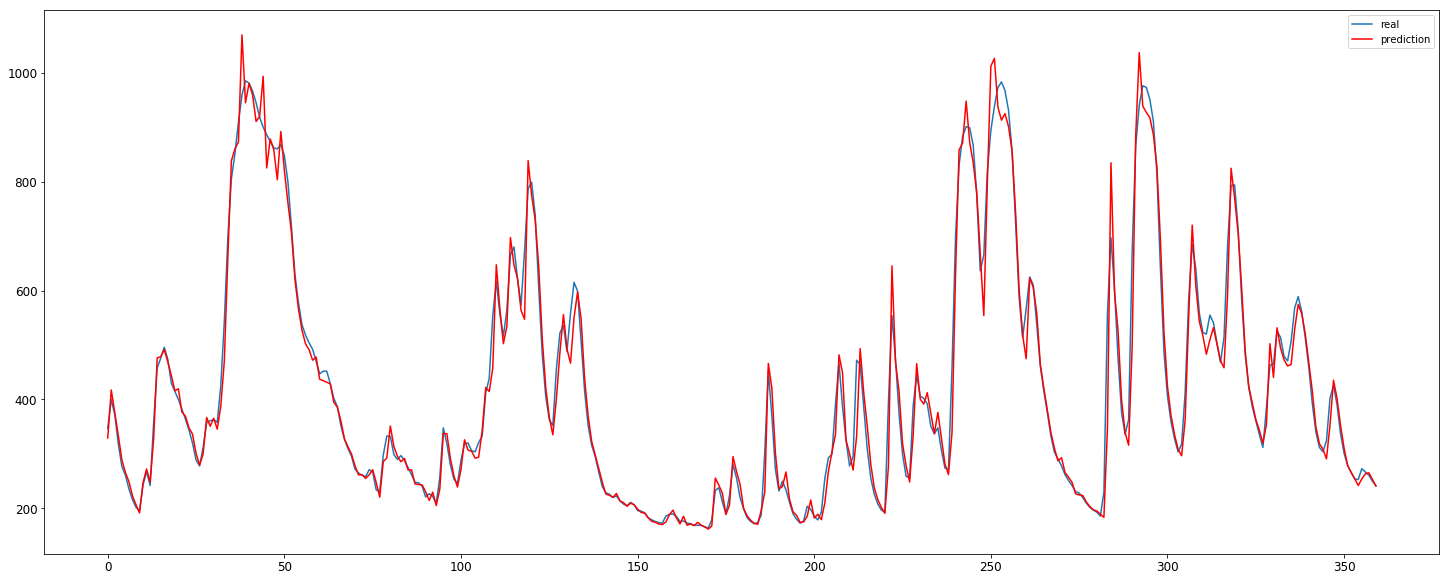

Forecast for lag:  3
Test MSE: 34.008
MAE:  20.1954722812


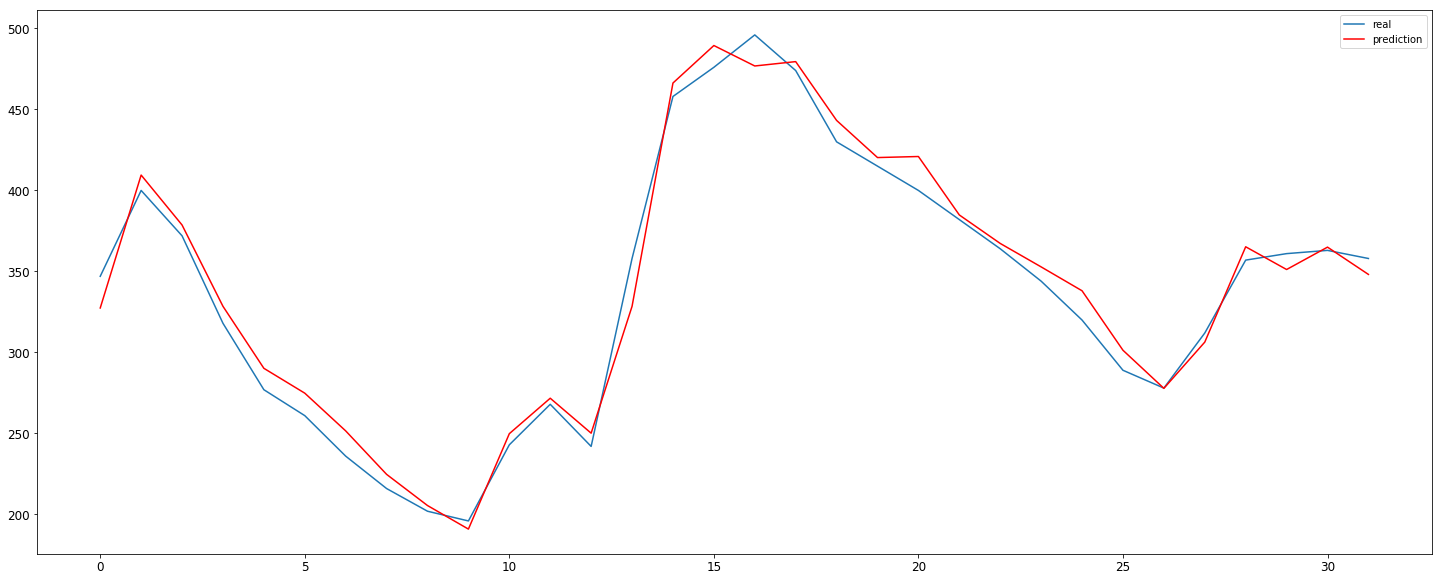

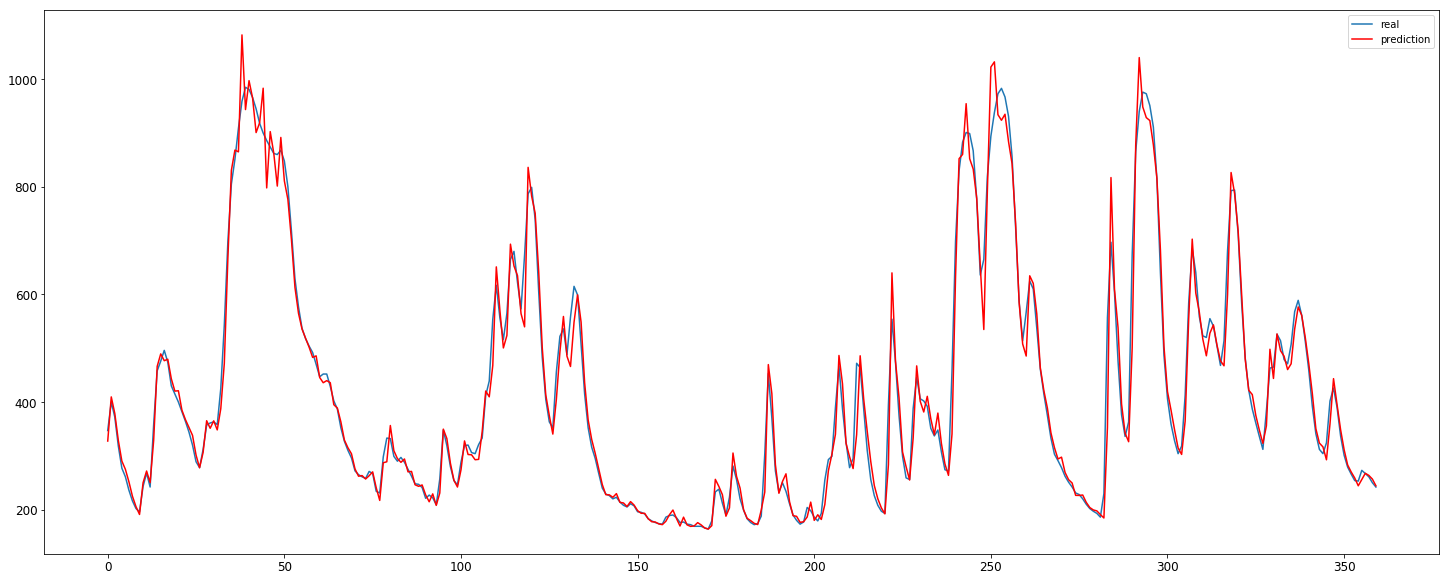

Forecast for lag:  4
Test MSE: 34.154
MAE:  20.4957445884


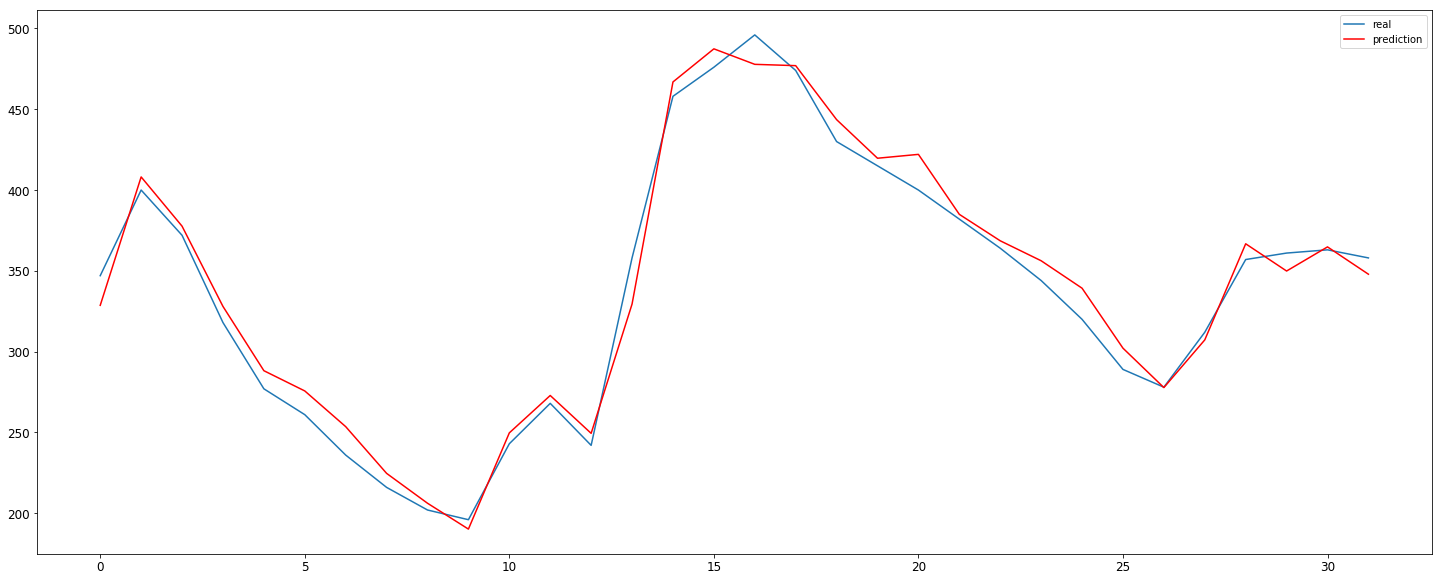

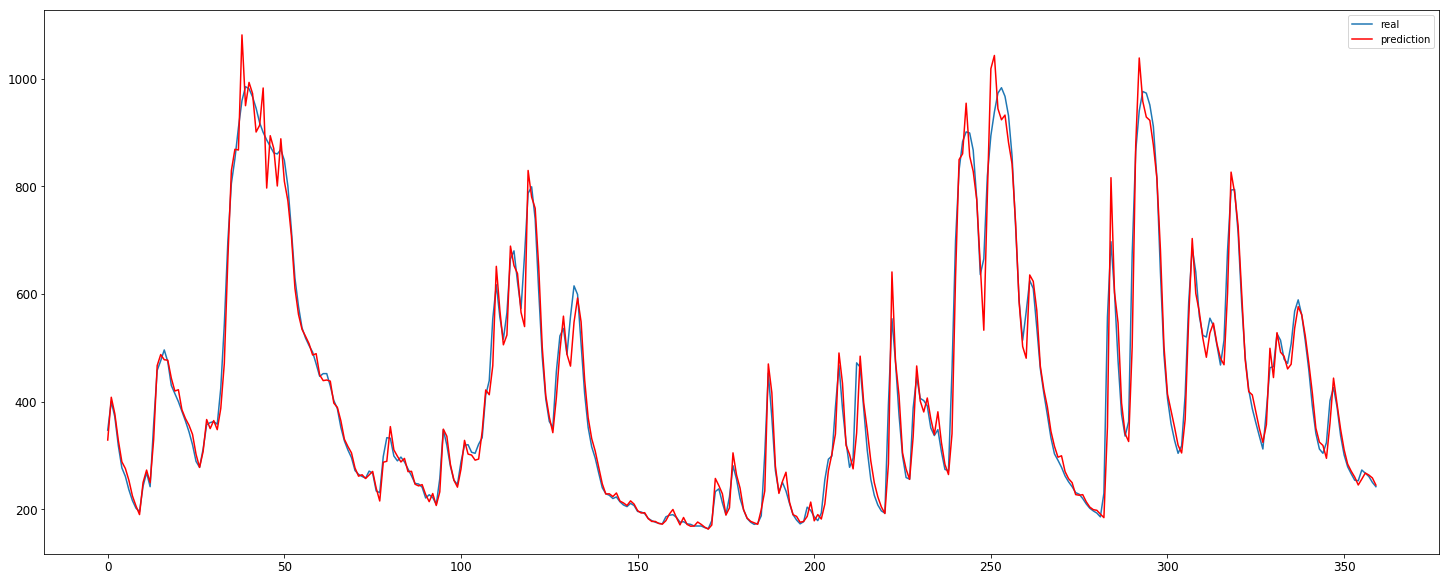

Forecast for lag:  5
Test MSE: 34.294
MAE:  20.5359840439


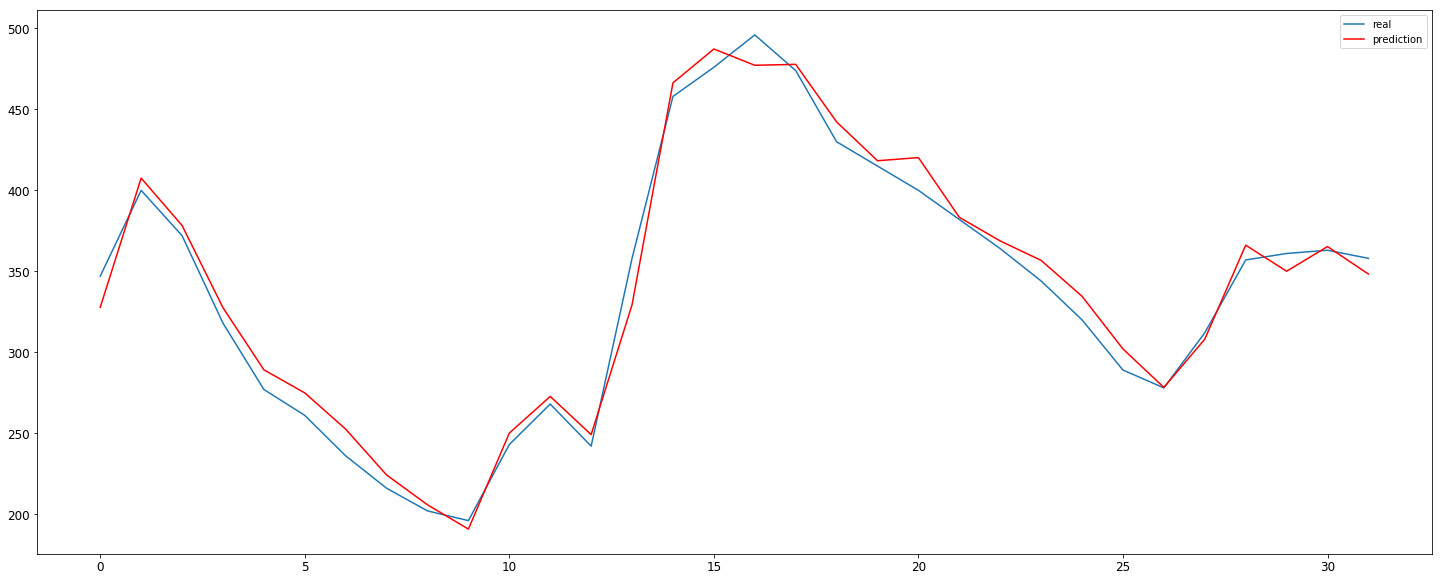

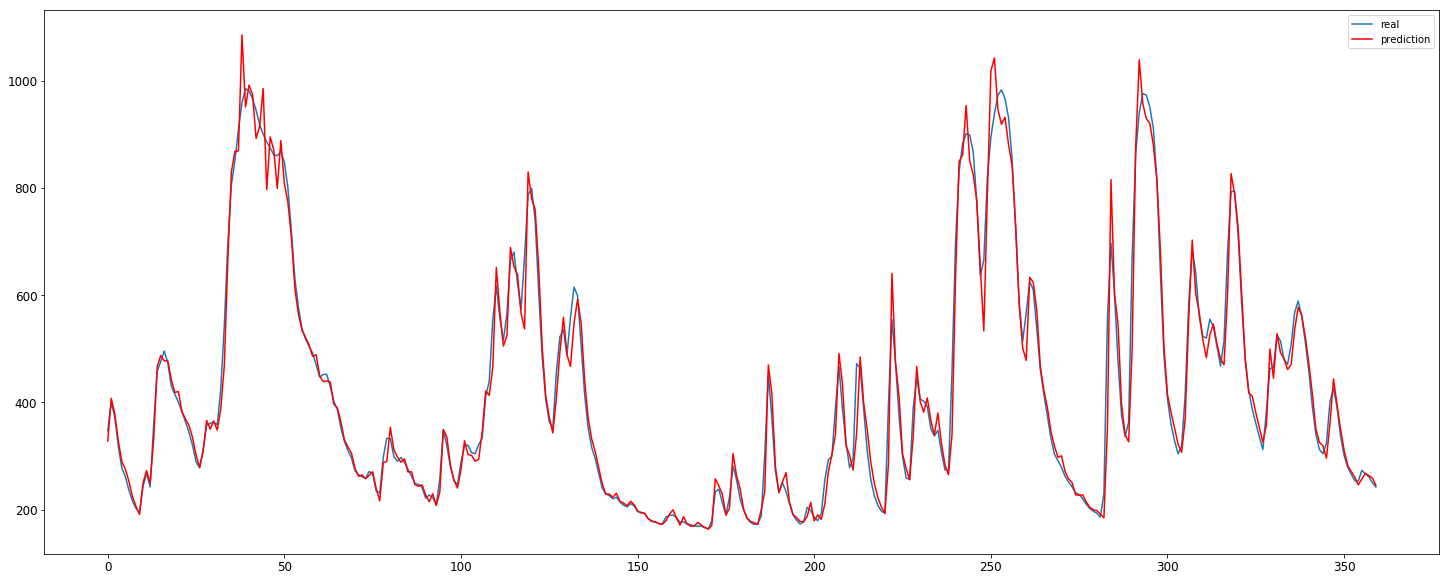

Forecast for lag:  6
Test MSE: 34.336
MAE:  20.5768218407


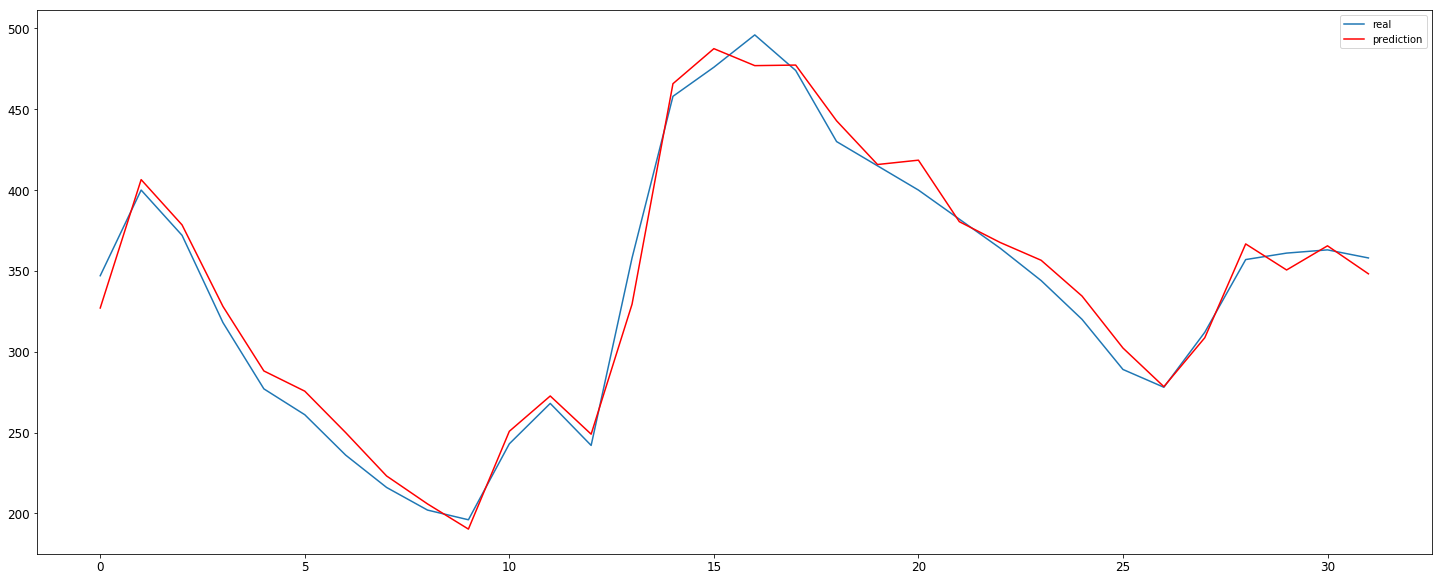

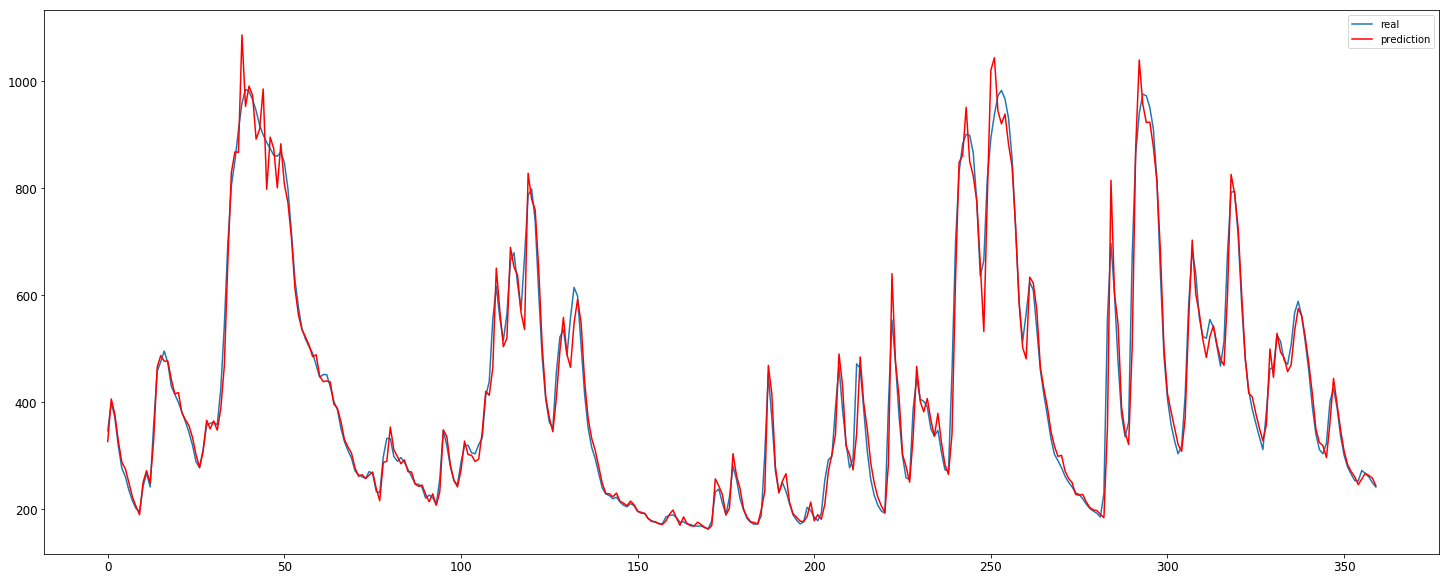

Forecast for lag:  7
Test MSE: 34.393
MAE:  20.6646875794


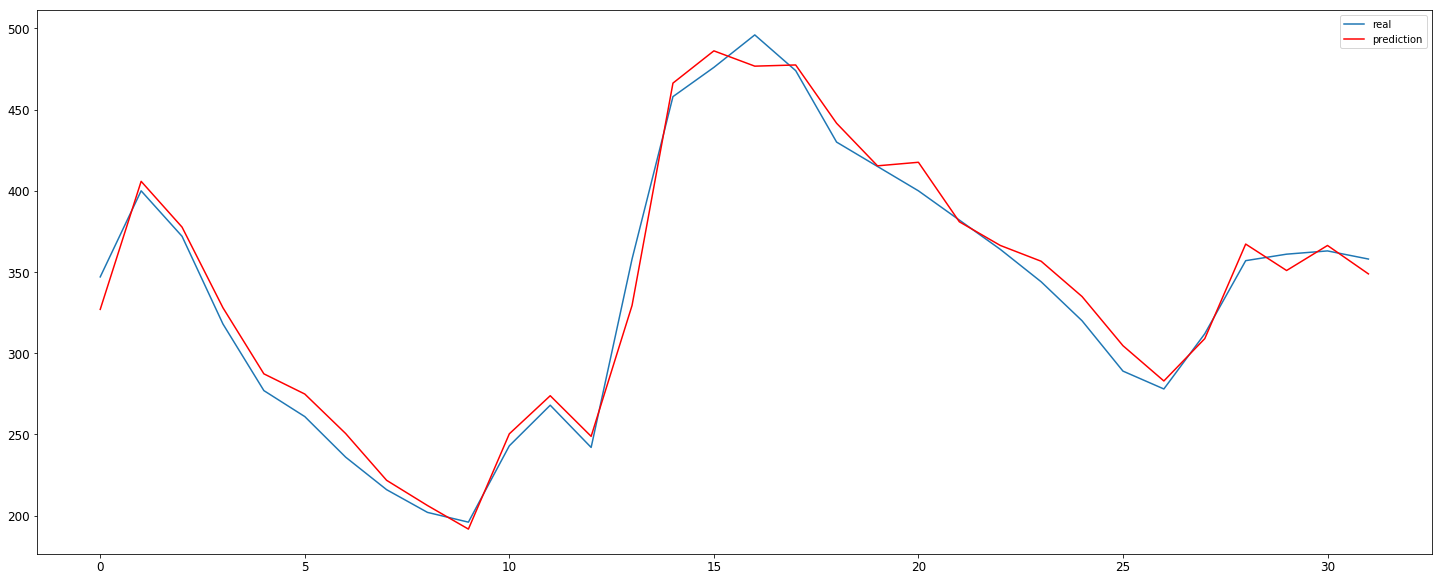

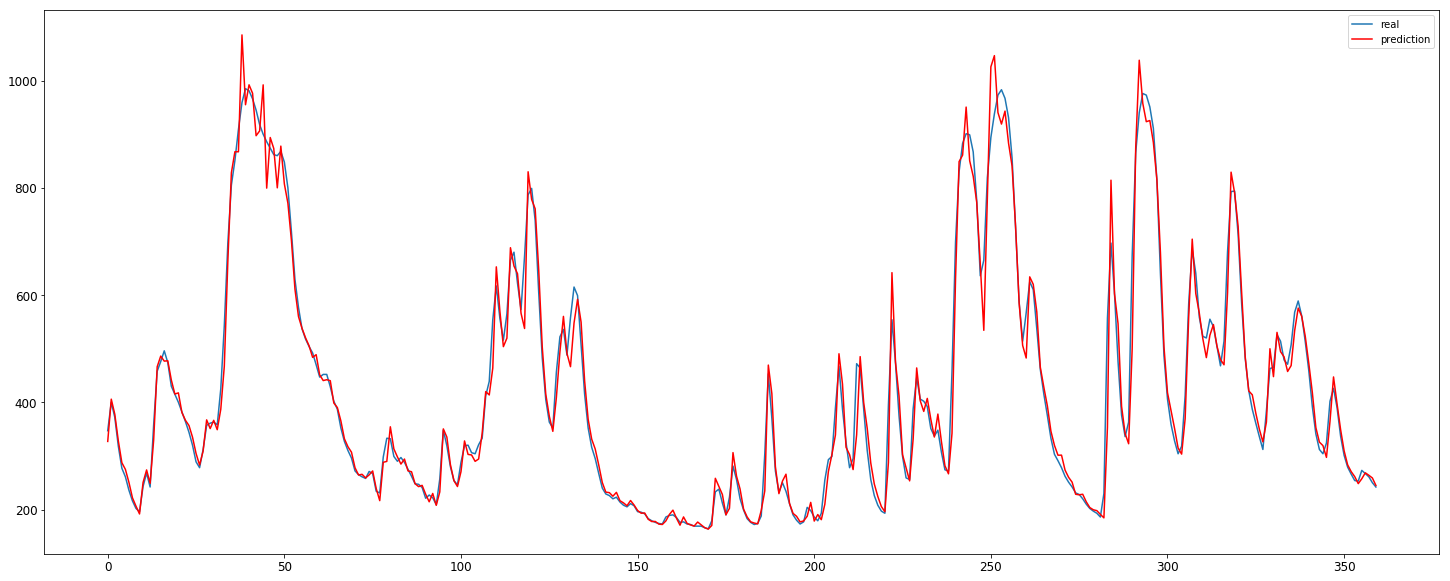

Forecast for lag:  8
Test MSE: 34.501
MAE:  20.7407294511


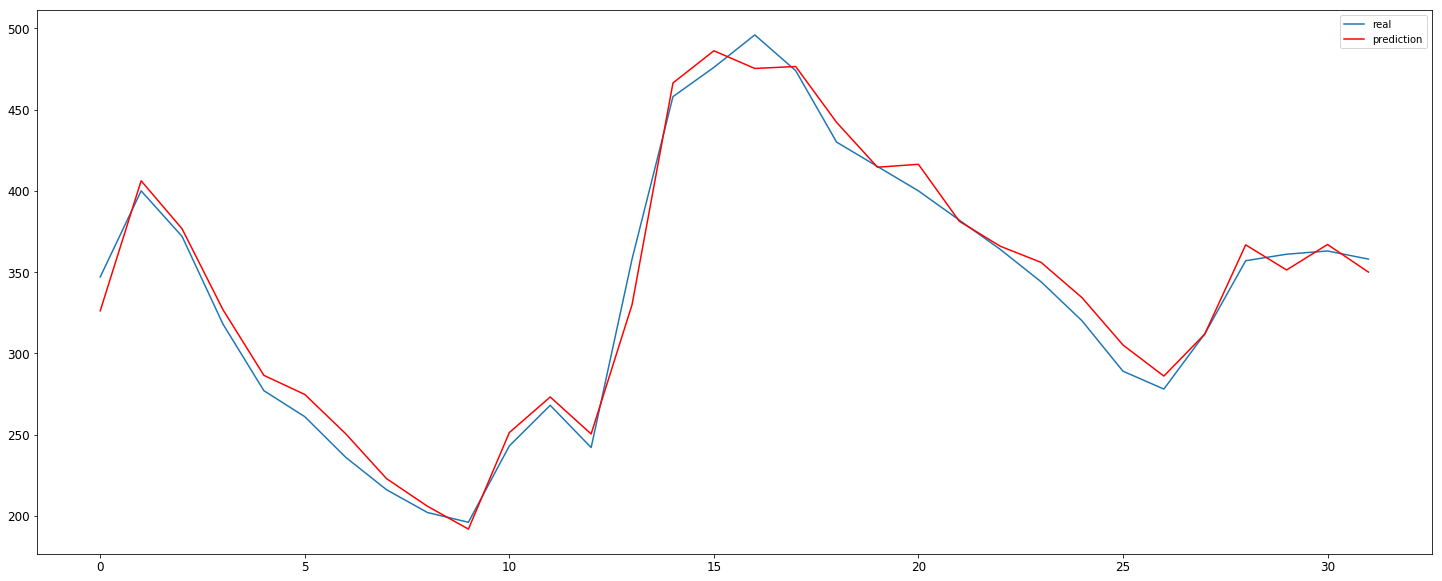

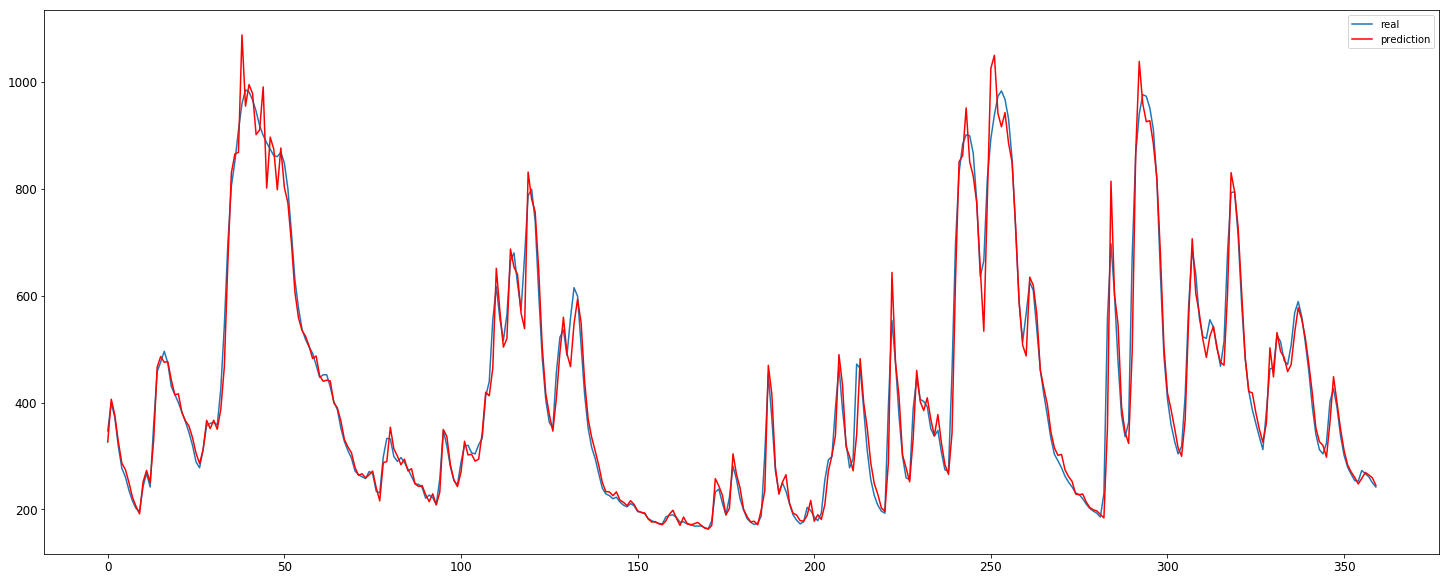

Forecast for lag:  9
Test MSE: 34.695
MAE:  20.9287349778


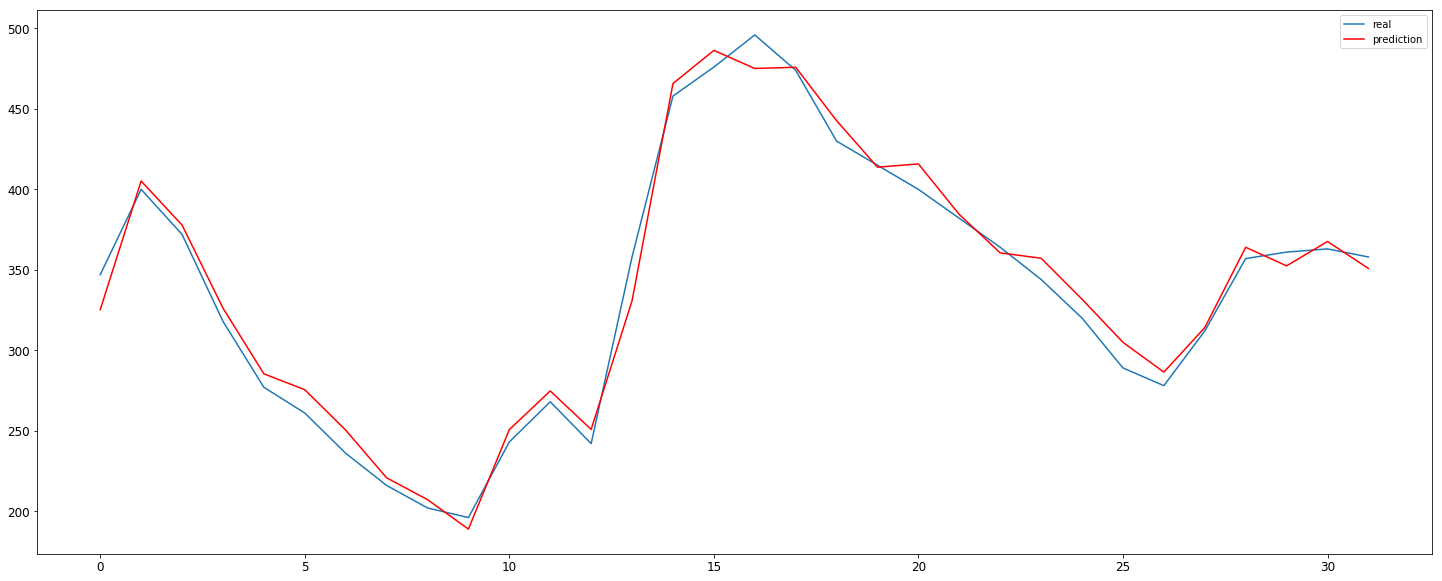

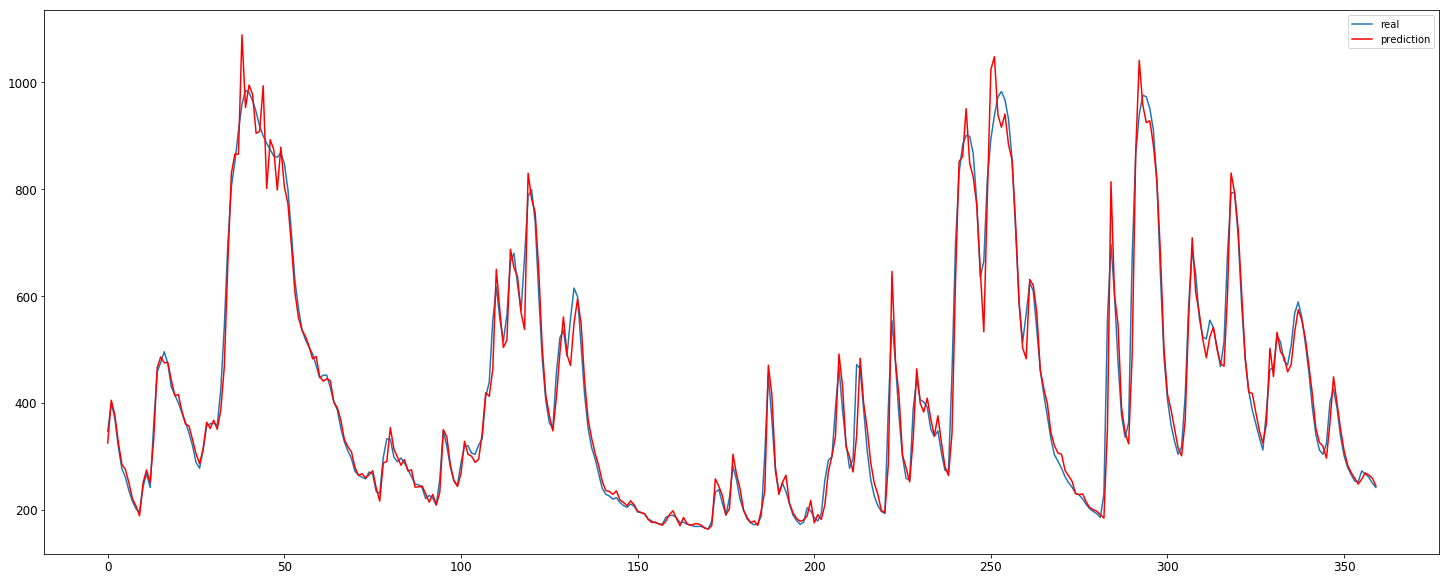

Forecast for lag:  10
Test MSE: 34.846
MAE:  21.159969586


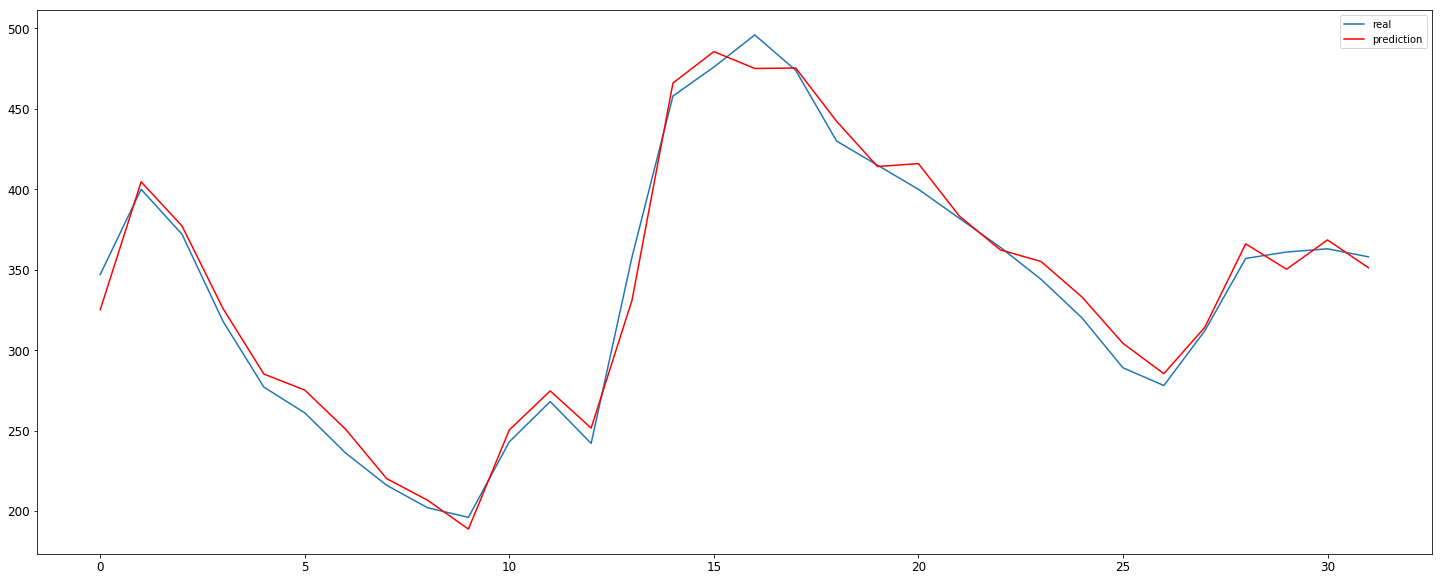

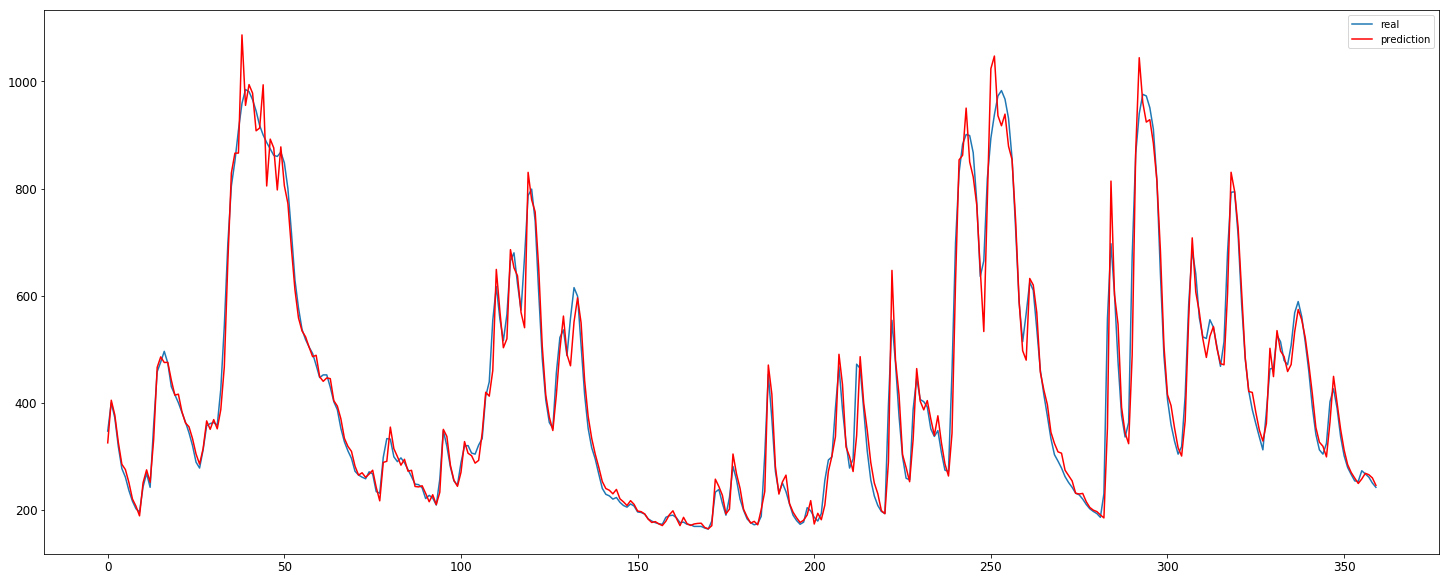

In [20]:
errors = []
for i in range(1, 11):
    errors.append(run_forecast(i))